<h2><strong>Import Libraries</strong></h2>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import gc


In [6]:
# Change Pandas Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  

<h2><strong>DO NOT RUN UNLESS YOU WANT A NEW SAMPLE</strong></h2>

In [7]:
# # Create a sample size we want
# sample_fraction = 500000 / 16000000

# # Read a sample of the csv
# df_sample = pd.read_csv('battles.csv', skiprows=lambda i: i > 0 and random.random() > sample_fraction)

# # Create new csv for sample
# df_sample.to_csv('battles_sample_500k.csv', index=False)

<h2><strong>Read and Verify CSV</strong></h2>

In [8]:
# Read CSV
df = pd.read_csv('battles.csv', nrows=500000)

# Print first five lines of CSV
print(df.head())

   Unnamed: 0                 battleTime    arena.id  gameMode.id  average.startingTrophies  winner.tag  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints winner.princessTowersHitPoints winner.clan.tag  winner.clan.badgeId   loser.tag  loser.startingTrophies  loser.trophyChange  loser.crowns  loser.kingTowerHitPoints loser.clan.tag  loser.clan.badgeId loser.princessTowersHitPoints  tournamentTag  winner.card1.id  winner.card1.level  winner.card2.id  winner.card2.level  winner.card3.id  winner.card3.level  winner.card4.id  winner.card4.level  winner.card5.id  winner.card5.level  winner.card6.id  winner.card6.level  winner.card7.id  winner.card7.level  winner.card8.id  winner.card8.level                                  winner.cards.list  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.id  \
0   

<h2><strong>Data Cleaning & Initial Inspection</strong></h2>

In [9]:
# Shape of Dataframe
print(df.shape)

(500000, 74)


In [10]:
# All Columns in Dataframe
cols = df.columns.tolist()
print(cols)

['Unnamed: 0', 'battleTime', 'arena.id', 'gameMode.id', 'average.startingTrophies', 'winner.tag', 'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints', 'winner.princessTowersHitPoints', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints', 'loser.clan.tag', 'loser.clan.badgeId', 'loser.princessTowersHitPoints', 'tournamentTag', 'winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 'winner.cards.list', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',

In [11]:
# Print Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['Unnamed: 0', 'arena.id', 'gameMode.id', 'average.startingTrophies', 'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints', 'winner.clan.badgeId', 'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints', 'loser.clan.badgeId', 'tournamentTag', 'winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average', 'loser.card1.id', 'loser.card1.level', 'loser.card2.id', 'loser.card2.level', 'loser.card3.id', 'loser.card3.level',
       'loser.car

In [12]:
# Print Data Types of Each Column
print(df.dtypes)

Unnamed: 0                          int64
battleTime                         object
arena.id                          float64
gameMode.id                       float64
average.startingTrophies          float64
winner.tag                         object
winner.startingTrophies           float64
winner.trophyChange               float64
winner.crowns                     float64
winner.kingTowerHitPoints         float64
winner.princessTowersHitPoints     object
winner.clan.tag                    object
winner.clan.badgeId               float64
loser.tag                          object
loser.startingTrophies            float64
loser.trophyChange                float64
loser.crowns                      float64
loser.kingTowerHitPoints          float64
loser.clan.tag                     object
loser.clan.badgeId                float64
loser.princessTowersHitPoints      object
tournamentTag                     float64
winner.card1.id                     int64
winner.card1.level                

In [13]:
# Null Values
print(df.isnull().sum())

Unnamed: 0                             0
battleTime                             0
arena.id                               0
gameMode.id                            0
average.startingTrophies               0
winner.tag                             0
winner.startingTrophies                0
winner.trophyChange                    0
winner.crowns                          0
winner.kingTowerHitPoints              0
winner.princessTowersHitPoints      9203
winner.clan.tag                     3491
winner.clan.badgeId                 3491
loser.tag                              0
loser.startingTrophies                 0
loser.trophyChange                     0
loser.crowns                           0
loser.kingTowerHitPoints          119692
loser.clan.tag                     27684
loser.clan.badgeId                 27684
loser.princessTowersHitPoints     235220
tournamentTag                     500000
winner.card1.id                        0
winner.card1.level                     0
winner.card2.id 

In [14]:
# Print Number of Unique Values
print(df.nunique())

Unnamed: 0                        500000
battleTime                        375929
arena.id                              15
gameMode.id                            3
average.startingTrophies            8503
winner.tag                         19039
winner.startingTrophies             5161
winner.trophyChange                   42
winner.crowns                          3
winner.kingTowerHitPoints           5833
winner.princessTowersHitPoints    220303
winner.clan.tag                     1450
winner.clan.badgeId                  166
loser.tag                         384109
loser.startingTrophies              5186
loser.trophyChange                    47
loser.crowns                           3
loser.kingTowerHitPoints            5833
loser.clan.tag                    205766
loser.clan.badgeId                   180
loser.princessTowersHitPoints       3652
tournamentTag                          0
winner.card1.id                      102
winner.card1.level                    13
winner.card2.id 

<h5>Handling Null Values & Dropping Uninfluential Columns</h5>

In [15]:
# Dropping Columns (Columns with not mutch meaning/influence)
df = df.drop(columns=['Unnamed: 0', 'winner.tag', 'winner.clan.tag', 'winner.clan.badgeId', 'loser.tag', 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag' ])

In [16]:
# Resolving Null Values to 0
df['winner.princessTowersHitPoints'] = df['winner.princessTowersHitPoints'].fillna(0)
df['loser.kingTowerHitPoints'] = df['loser.kingTowerHitPoints'].fillna(0)
df['loser.princessTowersHitPoints'] = df['loser.princessTowersHitPoints'].fillna(0)

In [17]:
# Reason we are able to resolve null values to 0

# Only appears when loser crowns is 2 which means that both winner and loser princess towers are destroyed (0 hitpoints)
print('Winner Princess Tower Hit Points to Loser Crowns:')
print(df.groupby(df['winner.princessTowersHitPoints'].isna())['loser.crowns'].describe())

# Null values appear when winner crowns is 3, which means that the king tower was destroyed (0 hit points)
print('\nLoser King Tower Hit Points to Winner Crowns:')
print(df.groupby(df['loser.kingTowerHitPoints'].isna())['winner.crowns'].describe())

# # Null values appear only when both princess towers are destroyed (0 hit points)
print('\nLoser Princess Tower Hit Points to Winner Crowns:')
print(df.groupby(df['loser.princessTowersHitPoints'].isna())['winner.crowns'].describe())

Winner Princess Tower Hit Points to Loser Crowns:
                                   count      mean      std  min  25%  50%  75%  max
winner.princessTowersHitPoints                                                      
False                           500000.0  0.301266  0.49731  0.0  0.0  0.0  1.0  2.0

Loser King Tower Hit Points to Winner Crowns:
                             count      mean       std  min  25%  50%  75%  max
loser.kingTowerHitPoints                                                       
False                     500000.0  1.709824  0.827492  1.0  1.0  1.0  2.0  3.0

Loser Princess Tower Hit Points to Winner Crowns:
                                  count      mean       std  min  25%  50%  75%  max
loser.princessTowersHitPoints                                                       
False                          500000.0  1.709824  0.827492  1.0  1.0  1.0  2.0  3.0


In [18]:
# Check for null values again
print(df.isnull().sum())

battleTime                        0
arena.id                          0
gameMode.id                       0
average.startingTrophies          0
winner.startingTrophies           0
winner.trophyChange               0
winner.crowns                     0
winner.kingTowerHitPoints         0
winner.princessTowersHitPoints    0
loser.startingTrophies            0
loser.trophyChange                0
loser.crowns                      0
loser.kingTowerHitPoints          0
loser.princessTowersHitPoints     0
winner.card1.id                   0
winner.card1.level                0
winner.card2.id                   0
winner.card2.level                0
winner.card3.id                   0
winner.card3.level                0
winner.card4.id                   0
winner.card4.level                0
winner.card5.id                   0
winner.card5.level                0
winner.card6.id                   0
winner.card6.level                0
winner.card7.id                   0
winner.card7.level          

<h5>Map Card ID's to Actual Card Names</h5>

In [19]:
# Map out card ID's to actual card names

card_map = {
    26000000: "Knight", 26000001: "Archers", 26000002: "Goblins", 26000003: "Giant",
    26000004: "P.E.K.K.A", 26000005: "Minions", 26000006: "Balloon", 26000007: "Witch",
    26000008: "Barbarians", 26000009: "Golem", 26000010: "Skeletons", 26000011: "Valkyrie",
    26000012: "Skeleton Army", 26000013: "Bomber", 26000014: "Musketeer", 26000015: "Baby Dragon",
    26000016: "Prince", 26000017: "Wizard", 26000018: "Mini P.E.K.K.A", 26000019: "Spear Goblins",
    26000020: "Giant Skeleton", 26000021: "Hog Rider", 26000022: "Minion Horde", 26000023: "Ice Wizard",
    26000024: "Royal Giant", 26000025: "Guards", 26000026: "Princess", 26000027: "Dark Prince",
    26000028: "Three Musketeers", 26000029: "Lava Hound", 26000030: "Ice Spirit", 26000031: "Fire Spirits",
    26000032: "Miner", 26000033: "Sparky", 26000034: "Bowler", 26000035: "Lumberjack", 26000036: "Battle Ram",
    26000037: "Inferno Dragon", 26000038: "Ice Golem", 26000039: "Mega Minion", 26000040: "Dart Goblin",
    26000041: "Goblin Gang", 26000042: "Electro Wizard", 26000043: "Elite Barbarians", 26000044: "Hunter",
    26000045: "Executioner", 26000046: "Bandit", 26000047: "Royal Recruits", 26000048: "Night Witch",
    26000049: "Bats", 26000050: "Royal Ghost", 26000051: "Ram Rider", 26000052: "Zappies",
    26000053: "Rascals", 26000054: "Cannon Cart", 26000055: "Mega Knight", 26000056: "Skeleton Barrel",
    26000057: "Flying Machine", 26000058: "Wall Breakers", 26000059: "Royal Hogs", 26000060: "Goblin Giant",
    26000061: "Fisherman", 26000062: "Magic Archer", 26000063: "Electro Dragon", 26000064: "Firecracker",
    26000067: "Elixir Golem", 26000068: "Battle Healer", 26000080: "Skeleton Dragons", 26000083: "Mother Witch",
    26000084: "Electro Spirit", 26000085: "Electro Giant", 27000000: "Cannon", 27000001: "Goblin Hut",
    27000002: "Mortar", 27000003: "Inferno Tower", 27000004: "Bomb Tower", 27000005: "Barbarian Hut",
    27000006: "Tesla", 27000007: "Elixir Collector", 27000008: "X-Bow", 27000009: "Tombstone",
    27000010: "Furnace", 27000012: "Goblin Cage", 28000000: "Fireball", 28000001: "Arrows",
    28000002: "Rage", 28000003: "Rocket", 28000004: "Goblin Barrel", 28000005: "Freeze",
    28000006: "Mirror", 28000007: "Lightning", 28000008: "Zap", 28000009: "Poison",
    28000010: "Graveyard", 28000011: "The Log", 28000012: "Tornado", 28000013: "Clone",
    28000014: "Earthquake", 28000015: "Barbarian Barrel", 28000016: "Heal Spirit",
    28000017: "Giant Snowball", 28000018: "Royal Delivery"
}

card_cols = [
    'winner.card1.id', 'winner.card2.id', 'winner.card3.id', 'winner.card4.id',
    'winner.card5.id', 'winner.card6.id', 'winner.card7.id', 'winner.card8.id',
    'loser.card1.id', 'loser.card2.id', 'loser.card3.id', 'loser.card4.id',
    'loser.card5.id', 'loser.card6.id', 'loser.card7.id', 'loser.card8.id'
]

for col in card_cols:
    df[col] = df[col].map(card_map)

# Check first few replacements
print(df[card_cols].head())


  winner.card1.id   winner.card2.id   winner.card3.id winner.card4.id winner.card5.id winner.card6.id   winner.card7.id winner.card8.id loser.card1.id loser.card2.id    loser.card3.id loser.card4.id   loser.card5.id loser.card6.id loser.card7.id   loser.card8.id
0      Battle Ram  Barbarian Barrel       Royal Ghost          Hunter     Cannon Cart     Heal Spirit  Elite Barbarians    Magic Archer  Goblin Barrel    Goblin Gang          Princess     Ice Spirit           Knight        The Log         Rocket            Tesla
1    Minion Horde     Skeleton Army  Elite Barbarians     Royal Giant          Wizard             Zap          Fireball         The Log         Bomber          Witch             Giant         Wizard    Goblin Barrel         Knight         Mirror         Valkyrie
2       P.E.K.K.A    Electro Wizard            Poison      Battle Ram     Royal Ghost    Magic Archer               Zap          Bandit    Goblin Gang       Princess  Barbarian Barrel  Inferno Tower       Ice Sp

<h2><strong>Exploratory Data Analysis</strong></h2>

In [20]:
# Summary Statistics
print(df.describe())

           arena.id   gameMode.id  average.startingTrophies  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  loser.startingTrophies  loser.trophyChange   loser.crowns  loser.kingTowerHitPoints  winner.card1.level  winner.card2.level  winner.card3.level  winner.card4.level  winner.card5.level  winner.card6.level  winner.card7.level  winner.card8.level  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.level  loser.card2.level  loser.card3.level  loser.card4.level  loser.card5.level  loser.card6.level  loser.card7.level  loser.card8.level  loser.totalcard.level  loser.troop.count  loser.structure.count  loser.spell.count  loser.common.count  loser.rare.count  loser.epic.count  loser.legendary.count  loser.elixir.average
count  5.000000e+05  5.000000e+05             500000.000000            50000

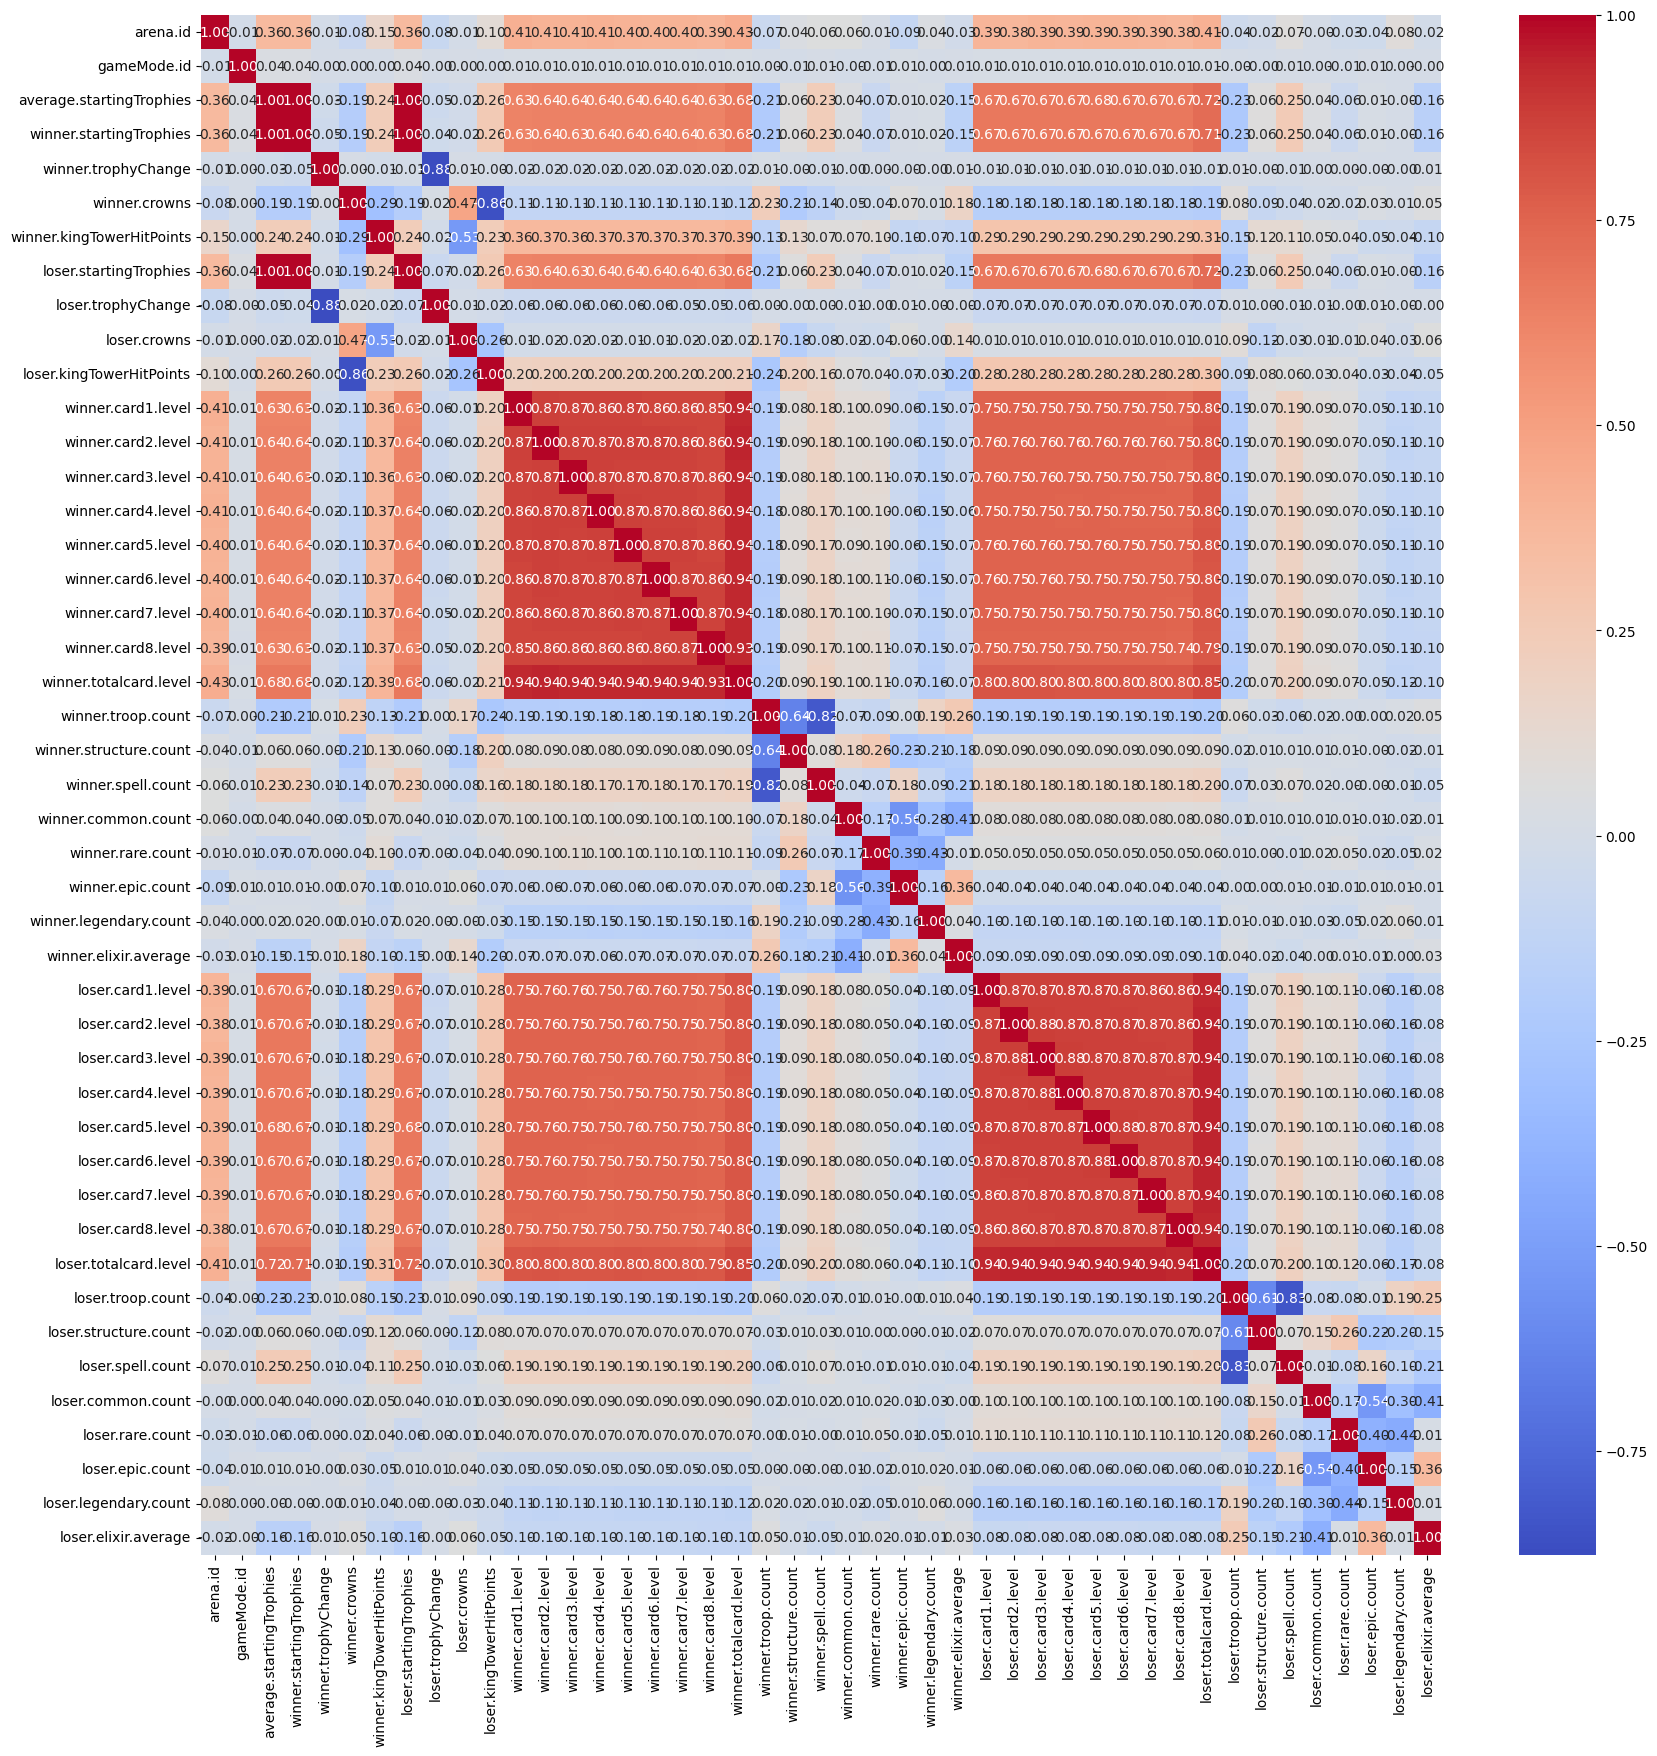

In [21]:
# Correlation Heatmap (How much does one variable affect the other)
plt.figure(figsize=(20, 20))
co_mtx = df.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap='coolwarm', fmt='.2f', annot=True)
plt.show()

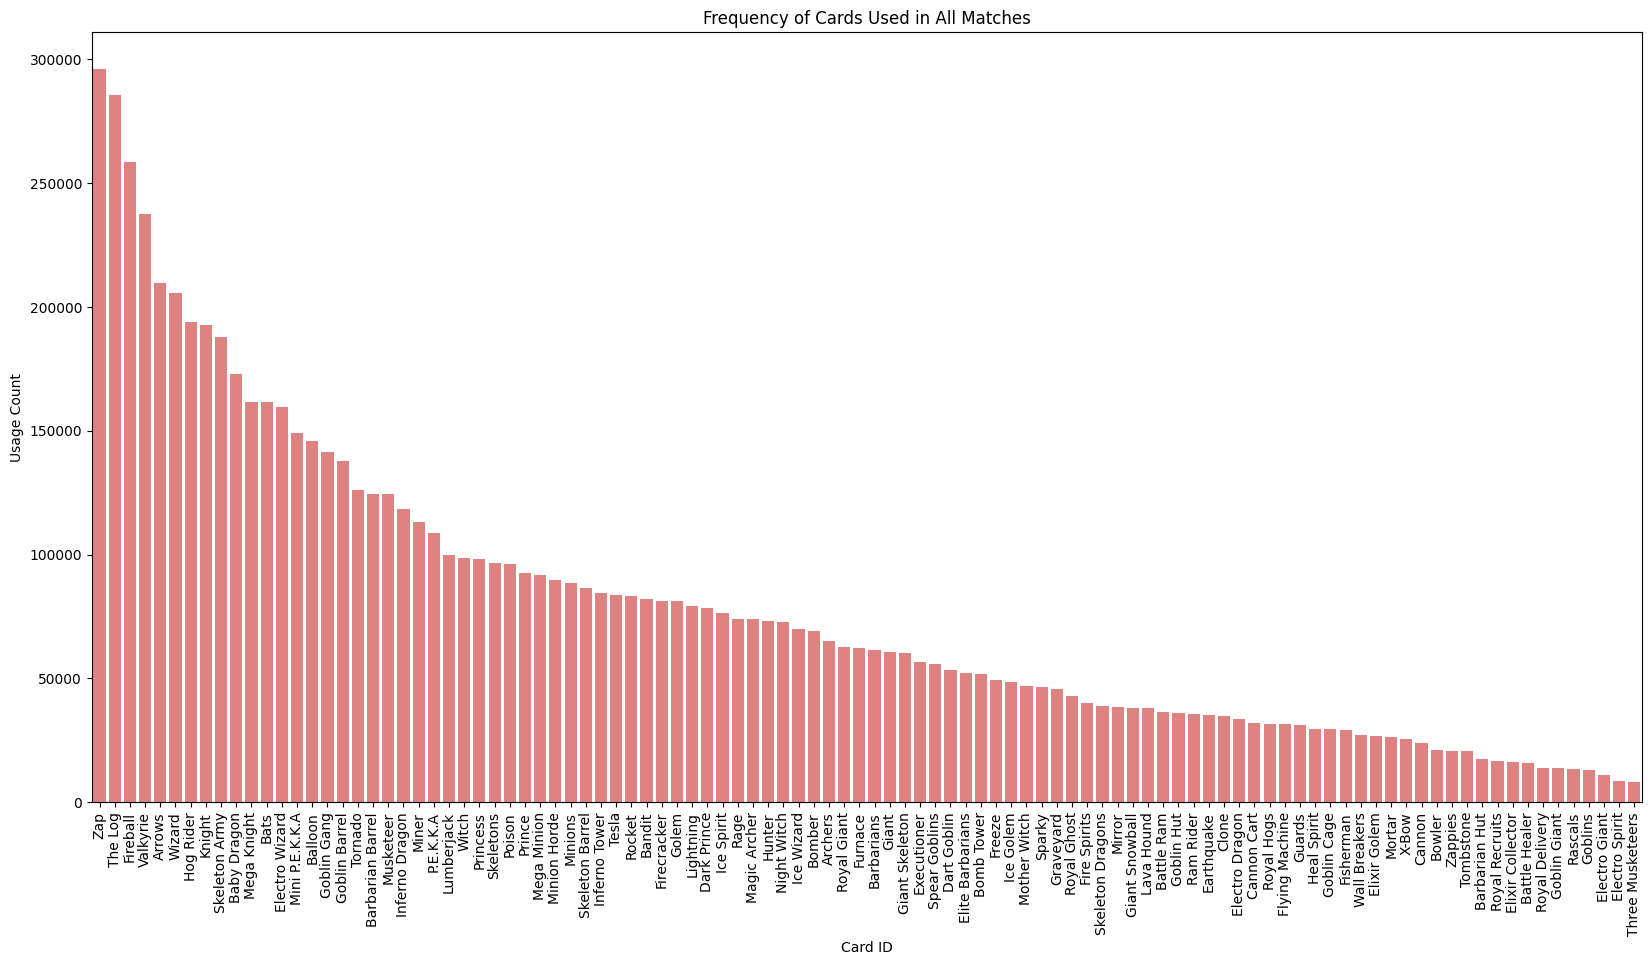

In [30]:
# Bar Plot of Cards used the most
all_cards = df[card_cols].values.flatten()
card_counts = pd.Series(all_cards).value_counts()


plt.figure(figsize=(20, 10))
sns.barplot(x=card_counts.index, y=card_counts.values, color='#ee7272')
plt.title("Frequency of Cards Used in All Matches")
plt.xlabel("Card ID")
plt.ylabel("Usage Count")
plt.xticks(rotation=90)
plt.show()

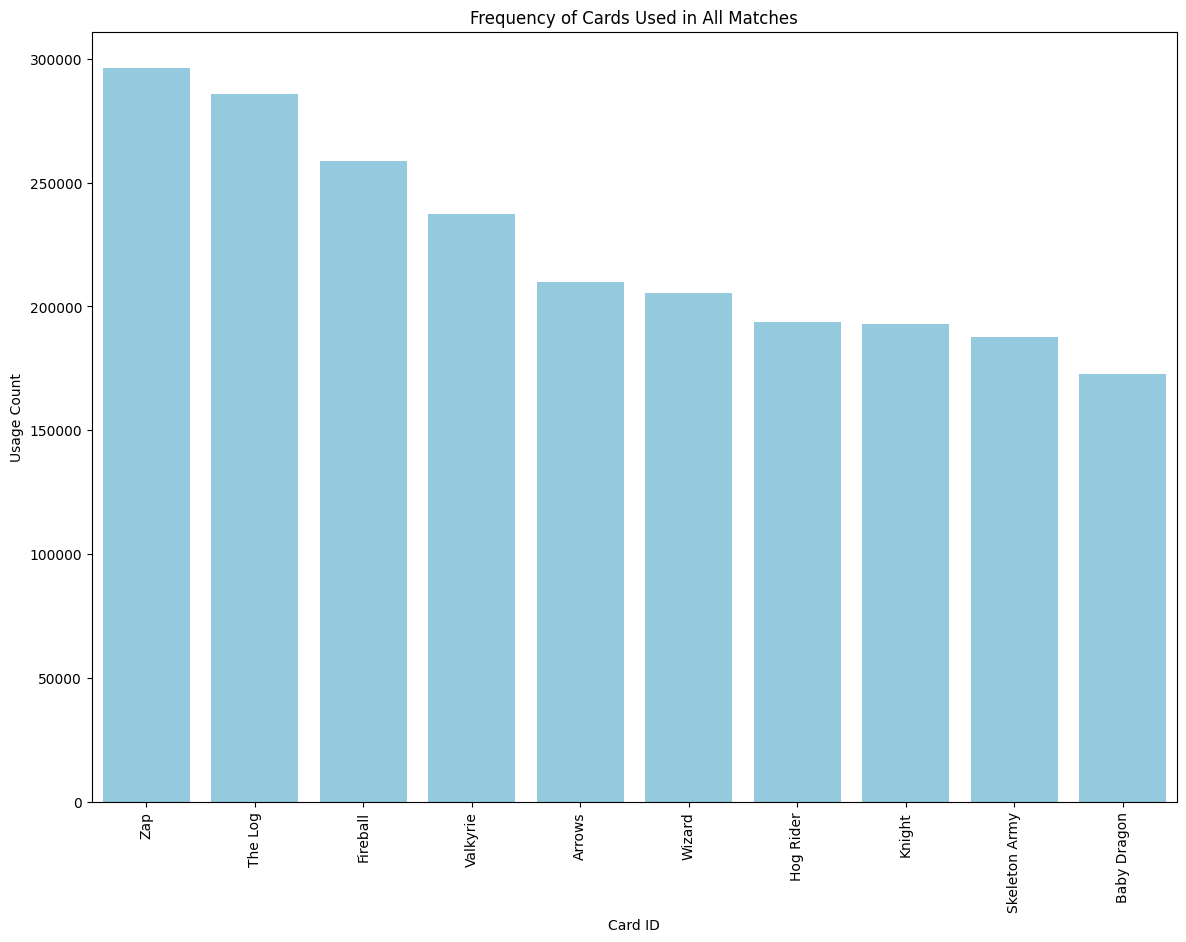

In [23]:
# Show the ten most used cards
top10 = card_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(x=top10.index, y=top10.values, color='skyblue')
plt.title("Frequency of Cards Used in All Matches")
plt.xlabel("Card ID")
plt.ylabel("Usage Count")
plt.xticks(rotation=90)
plt.show()

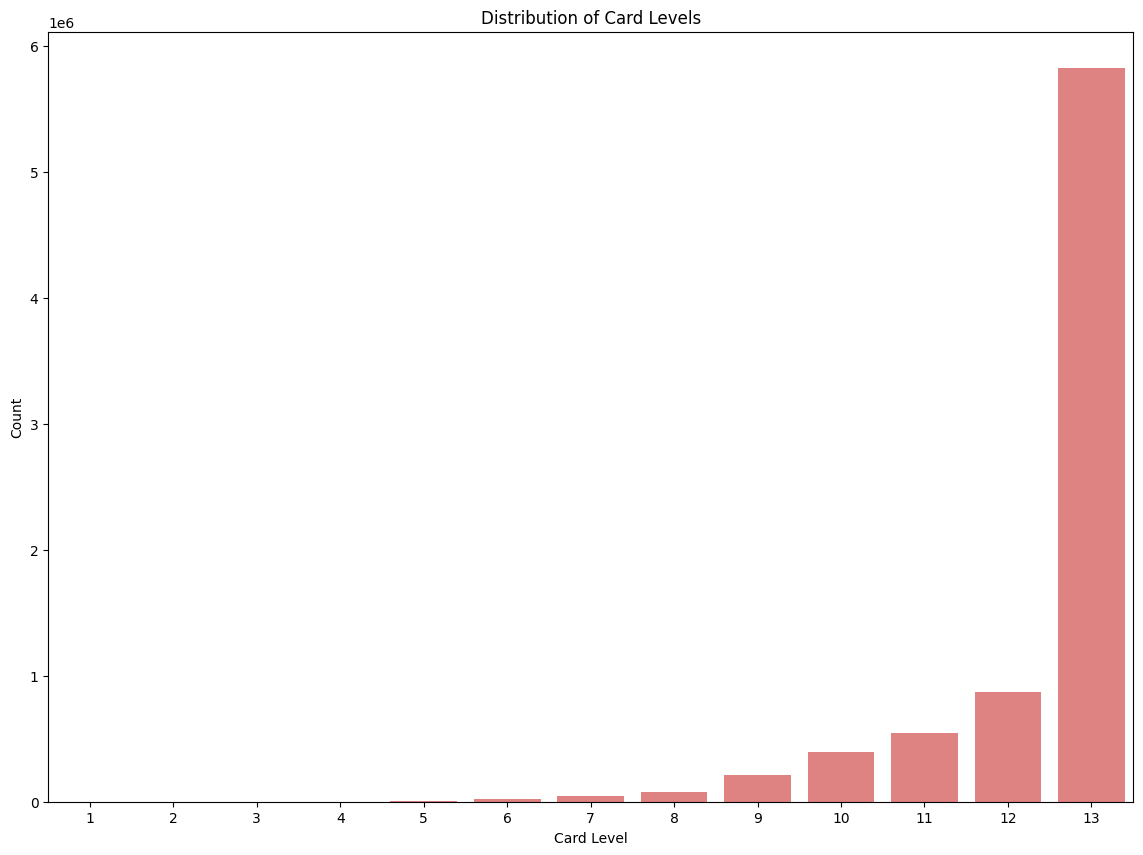

In [32]:
# # Bar plot of card levels
# all_card_levels = df[[f'winner.card{i}.level' for i in range(1, 13)] + [f'loser.card{i}.level' for i in range(1, 13)]].values.flatten()
# card_level_counts = pd.Series(all_cards).value_counts()

# plt.figure(figsize=(14, 10))
# sns.barplot(x=card_level_counts, y=all_card_levels)
# plt.title('Distribution of Card Levels')
# plt.ylabel('Card Level')
# plt.show()




all_levels = df[
    [f'winner.card{i}.level' for i in range(1, 9)] +
    [f'loser.card{i}.level' for i in range(1, 9)]
].values.flatten()


level_counts = pd.Series(all_levels).value_counts().sort_index()

level_df = level_counts.reset_index()
level_df.columns = ["level", "count"]

plt.figure(figsize=(14, 10))
sns.barplot(data=level_df, x="level", y="count", color='#ee7272')
plt.title("Distribution of Card Levels")
plt.xlabel("Card Level")
plt.ylabel("Count")
plt.show()

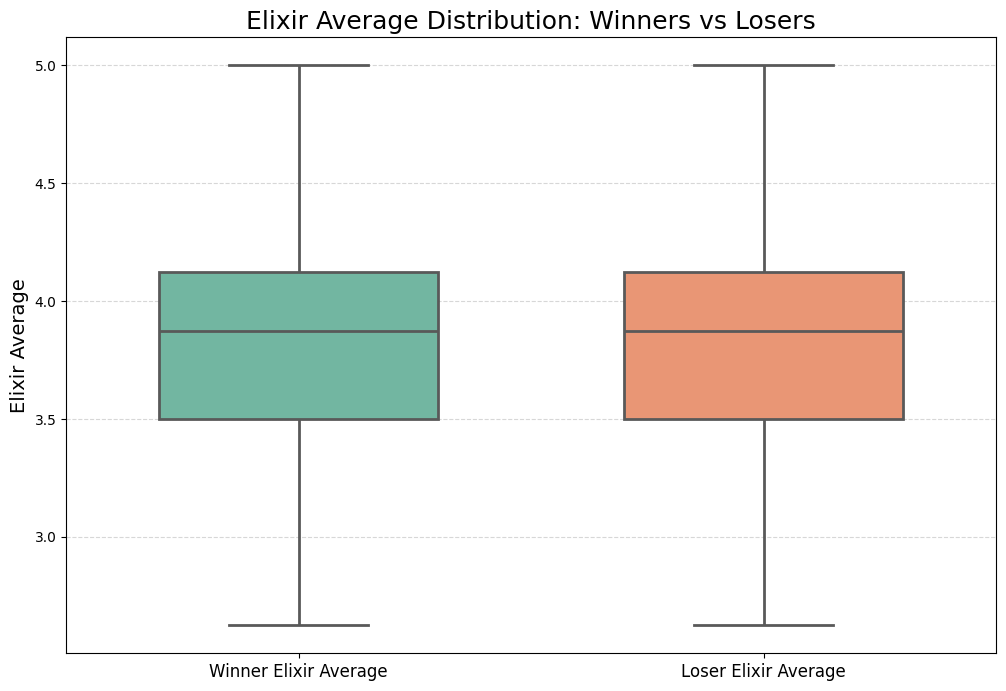

In [37]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df[['winner.elixir.average', 'loser.elixir.average']],
    palette="Set2",
    width=0.6,
    linewidth=2,
    showfliers=False   # <<< removes outliers
)

plt.title("Elixir Average Distribution: Winners vs Losers", fontsize=18)
plt.ylabel("Elixir Average", fontsize=14)
plt.xlabel("")
plt.xticks(
    [0, 1],
    ["Winner Elixir Average", "Loser Elixir Average"],
    fontsize=12
)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


In [49]:
# Winner decks
winner_df = df[['winner.card1.id','winner.card2.id','winner.card3.id','winner.card4.id',
                'winner.card5.id','winner.card6.id','winner.card7.id','winner.card8.id']].copy()
winner_df['won'] = 1
winner_df['deck'] = winner_df.apply(lambda row: list(row[:-1]), axis=1)  # combine cards into a list
winner_df = winner_df[['deck','won']]

# Loser decks
loser_df = df[['loser.card1.id','loser.card2.id','loser.card3.id','loser.card4.id',
               'loser.card5.id','loser.card6.id','loser.card7.id','loser.card8.id']].copy()
loser_df['won'] = 0
loser_df['deck'] = loser_df.apply(lambda row: list(row[:-1]), axis=1)
loser_df = loser_df[['deck','won']]

# Combine
df_model = pd.concat([winner_df, loser_df], ignore_index=True)

In [54]:
def get_archetype(deck):
    if 'Hog Rider' in deck:
        return 'Hog Cycle'
    elif 'Lava Hound' in deck and 'Balloon' in deck:
        return 'LavaLoon'
    elif 'Royal Giant' in deck:
        return 'Royal Giant'
    elif 'Miner' in deck:
        return 'Miner Control'
    elif 'X-Bow' in deck:
        return 'X-Bow'
    elif 'Battle Ram' in deck or 'Bandit' in deck:
        return 'Bridge Spam'
    elif 'Golem' in deck:
        return 'Sneaky Golem'
    else:
        return 'Other'

df_model['archetype'] = df_model['deck'].apply(get_archetype)


In [56]:
win_rates = df_model.groupby('archetype')['won'].mean().reset_index()
win_rates = win_rates.sort_values(by='won', ascending=False)
print(win_rates)

       archetype       won
2       LavaLoon  0.607046
7          X-Bow  0.542358
3  Miner Control  0.528603
6   Sneaky Golem  0.517436
5    Royal Giant  0.503493
0    Bridge Spam  0.500865
4          Other  0.489946
1      Hog Cycle  0.481374


C:\Users\docar\AppData\Local\Temp\ipykernel_14412\3109110634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


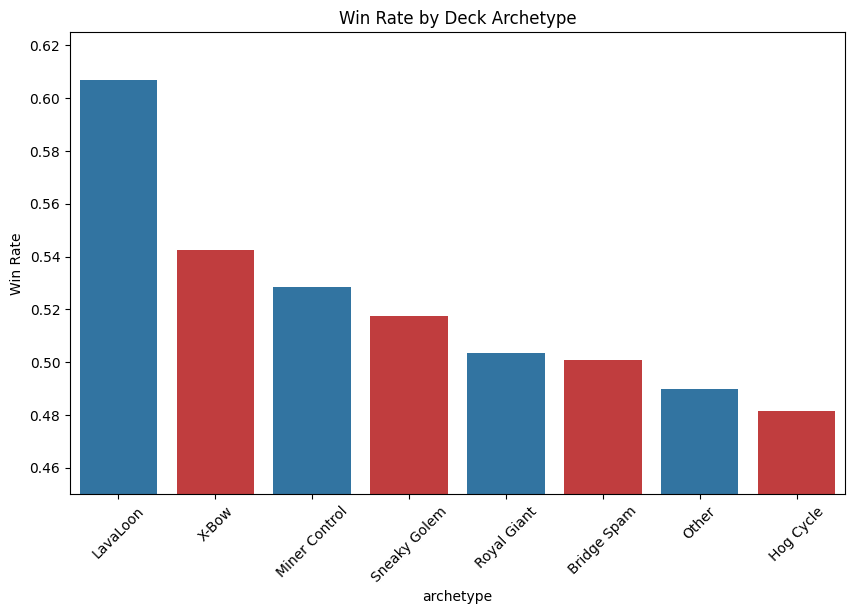

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=win_rates, 
    x='archetype', 
    y='won', 
    palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"])
    )

plt.xticks(rotation=45)
plt.ylabel('Win Rate')
plt.title('Win Rate by Deck Archetype')

# Zoom in on 0.4 - 0.6 win rate
plt.ylim(0.45, 0.625)

plt.show()

In [ ]:

all_cards = []

for _, row in df_model.iterrows():
    for card in row['deck']:
        all_cards.append({
            'card': card,
            'won': row['won']
        })

cards_df = pd.DataFrame(all_cards)

In [ ]:

card_win_rates = cards_df.groupby('card')['won'].mean().reset_index()
card_win_rates = card_win_rates.sort_values(by='won', ascending=False)
print(card_win_rates.head(20))  # top 20 cards
print(card_win_rates.tail(20))  # bottom 20 cards

                 card       won
56         Lava Hound  0.601884
86   Skeleton Dragons  0.592950
39        Goblin Cage  0.582828
47        Heal Spirit  0.575981
19         Earthquake  0.571420
15        Cannon Cart  0.568694
41       Goblin Giant  0.562694
22     Electro Spirit  0.562625
49             Hunter  0.558095
6       Barbarian Hut  0.556855
79     Royal Delivery  0.556697
61        Mega Minion  0.546785
11         Bomb Tower  0.545769
5    Barbarian Barrel  0.545289
101           Zappies  0.542601
20     Electro Dragon  0.540282
99              X-Bow  0.539006
7          Barbarians  0.538981
96      Wall Breakers  0.538479
87          Skeletons  0.538441
                card       won
34           Furnace  0.477633
73            Prince  0.475905
16             Clone  0.474322
46            Guards  0.472817
12            Bomber  0.471114
74          Princess  0.470850
36    Giant Skeleton  0.470544
43           Goblins  0.470274
95          Valkyrie  0.467740
75              Ra

C:\Users\docar\AppData\Local\Temp\ipykernel_14412\1443172425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='won', y='card',  palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"]))
C:\Users\docar\AppData\Local\Temp\ipykernel_14412\1443172425.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_20, x='won', y='card',  palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"]))


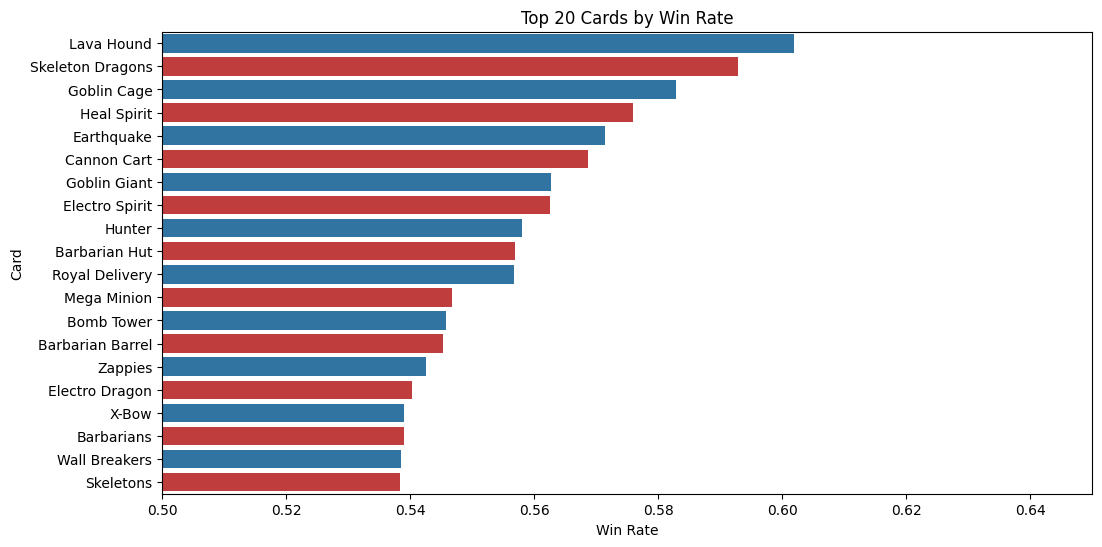

In [74]:
top_20 = card_win_rates.head(20)
bottom_20 = card_win_rates.tail(20)

plt.figure(figsize=(12,6))
sns.barplot(data=top_20, x='won', y='card',  palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"]))
plt.title('Top 20 Cards by Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Card')

# Zoom into 0.4 - 0.8 win rate
plt.xlim(0.5, 0.65)

plt.show()


C:\Users\docar\AppData\Local\Temp\ipykernel_14412\284984344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_20, x='won', y='card',  palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"]))
C:\Users\docar\AppData\Local\Temp\ipykernel_14412\284984344.py:2: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=bottom_20, x='won', y='card',  palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"]))


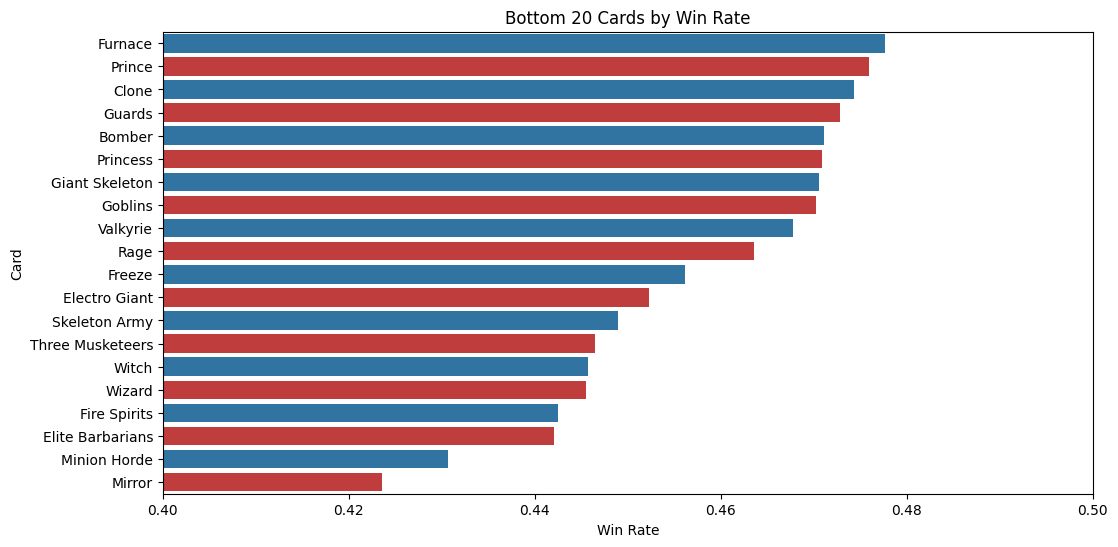

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=bottom_20, x='won', y='card',  palette=sns.color_palette(["#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728", "#1f77b4", "#d62728"]))
plt.title('Bottom 20 Cards by Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Card')


plt.xlim(0.4, 0.5)

plt.show()

<h2><strong>Data Prep for Model Building</strong></h2>

<h5>Create Baseline DataFrames Which Will Be Used To Create Main DataFrame</h5>

In [ ]:
# Create 2 dataframes, one with winning decks, another with losing decks and their outcomes

win_df = df[['winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 'winner.card3.id', 
             'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 'winner.card5.id', 'winner.card5.level', 
             'winner.card6.id', 'winner.card6.level', 'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 
             'winner.card8.level', 'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 
             'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 
             'winner.elixir.average']].copy()
win_df['target'] = 1

lose_df = df[['loser.card1.id', 'loser.card1.level', 'loser.card2.id', 'loser.card2.level', 'loser.card3.id',
              'loser.card3.level', 'loser.card4.id', 'loser.card4.level', 'loser.card5.id', 'loser.card5.level', 
              'loser.card6.id', 'loser.card6.level', 'loser.card7.id', 'loser.card7.level', 'loser.card8.id', 
              'loser.card8.level', 'loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 
              'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 
              'loser.elixir.average']].copy()
lose_df['target'] = 0


In [ ]:
# Transform win_df so that each column is each and every card in the dataset and will either have a value of 0 or its level depending on if the card is in that deck

win_card_cols = [f'winner.card{i}.id' for i in range(1, 9)]
win_card_levels = [f'winner.card{i}.level' for i in range(1, 9)]

win_cards_long = pd.DataFrame({
    'deck': win_df.index.repeat(8),
    'card_id': win_df[win_card_cols].values.flatten(),
    'card_level': win_df[win_card_levels].values.flatten(),
    'target': win_df['target'].repeat(8)
})

win_cards_long = win_cards_long.pivot_table(
    index = 'deck',
    columns = 'card_id',
    values = 'card_level',
    fill_value = 0
)

win_numeric_cols = win_df[['winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 
             'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 
             'winner.elixir.average']].reset_index(drop=True)

win_numeric_cols = win_numeric_cols.rename(columns={
    'winner.totalcard.level': 'totalcard_level',
    'winner.troop.count': 'troop_count',
    'winner.structure.count': 'structure_count',
    'winner.spell.count': 'spell_count',
    'winner.common.count': 'common_count',
    'winner.rare.count': 'rare_count',
    'winner.epic.count': 'epic_count',
    'winner.legendary.count': 'legendary_count',
    'winner.elixir.average': 'elixir_average'
})


final_win_df = pd.concat([win_numeric_cols, win_cards_long.reset_index(drop=True)], axis=1)
final_win_df['target'] = win_df['target'].values

print(final_win_df.head())
print(final_win_df.shape)


In [ ]:
# Transform lose_df so that each column is each and every card in the dataset and will either have a value of 0 or its level depending on if the card is in that deck

lose_card_cols = [f'loser.card{i}.id' for i in range(1, 9)]
lose_card_levels = [f'loser.card{i}.level' for i in range(1, 9)]


lose_cards_long = pd.DataFrame({
    'deck': lose_df.index.repeat(8),
    'card_id': lose_df[lose_card_cols].values.flatten(),
    'card_level': lose_df[lose_card_levels].values.flatten(),
    'target': lose_df['target'].repeat(8)
})

lose_cards_long = lose_cards_long.pivot_table(
    index = 'deck',
    columns = 'card_id',
    values = 'card_level',
    fill_value = 0
)

lose_numeric_cols = lose_df[['loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 
              'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 
              'loser.elixir.average']].reset_index(drop=True)

lose_numeric_cols = lose_numeric_cols.rename(columns={
    'loser.totalcard.level': 'totalcard_level',
    'loser.troop.count': 'troop_count',
    'loser.structure.count': 'structure_count',
    'loser.spell.count': 'spell_count',
    'loser.common.count': 'common_count',
    'loser.rare.count': 'rare_count',
    'loser.epic.count': 'epic_count',
    'loser.legendary.count': 'legendary_count',
    'loser.elixir.average': 'elixir_average'
})


final_lose_df = pd.concat([lose_numeric_cols, lose_cards_long.reset_index(drop=True)], axis=1)
final_lose_df['target'] = lose_df['target'].values


print(final_lose_df.head())
print(final_lose_df.shape)

<h5><strong>Creating a new dataframe which includes winning and losing cards from each match on the same row and which deck won (1 or 0)</strong></h5>

In [ ]:
# Combine both lose and win df onto axis 1
final_win_df.pop('target')
final_lose_df.pop('target')

final_win_df = final_win_df.add_prefix('deckA.')
final_lose_df = final_lose_df.add_prefix('deckB.')

X = pd.concat([final_win_df, final_lose_df], axis=1).reset_index(drop=True)
X['target'] = 1.0

print(X.head())

In [ ]:
# 50% of rows will be swapped
swap = np.random.rand(len(X)) < 0.5

# Columns for each deck
winner_cols = [col for col in X.columns if col.startswith('deckA.')]
loser_cols = [col for col in X.columns if col.startswith('deckB.')]

# Swap decks where swap is True
X_swap = X[swap].copy()
X_swap[winner_cols], X_swap[loser_cols] = X_swap[loser_cols].values, X_swap[winner_cols].values

# Flip outcome for swapped rows
X_swap['target'] = 1 - X_swap['target']

# Replace original rows with swapped ones
X.loc[swap] = X_swap
y = X.pop('target')

print(X.head())
print(X.shape)

<h5>Scale Dataset</h5>

In [ ]:
# Scale Data
scaler = StandardScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))

X.columns = cols
print(X.head())
print(X.shape)


<h5>Delete Unused DataFrames to Save Memory</h5>

In [ ]:
del win_card_cols, win_cards_long, win_numeric_cols, win_df, final_win_df, lose_card_cols, lose_cards_long, lose_numeric_cols, lose_df, final_lose_df
gc.collect() 

<h5><strong>Train Test Split</strong></h5>

In [ ]:
# Perform an 80/20 split on the second dataset (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

<h2><strong>Model Building</strong></h2>

<h5><strong>Predicting overall win rate of deck A vs deck B</strong></h5>

<h5>Neural Network</h5>

In [ ]:
# Define all needed functions/methods

Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
Model = tf.keras.models.Model
Sequential = tf.keras.Sequential

In [ ]:
# Define Neural Network Model

num_features = X_train.shape[1]

nn_model = Sequential([
    Dense(256, input_dim=num_features, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

print(nn_model.summary())

In [ ]:
# Train neural network with our data

epochs = 30

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model_history = nn_model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=epochs, batch_size=512, verbose=1)

In [ ]:
# Graph Training and Validation accuracy and loss

acc = nn_model_history.history['accuracy']
val_acc = nn_model_history.history['val_accuracy']

loss = nn_model_history.history['loss']
val_loss = nn_model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h2><strong>User Functions to Predict Win Rate</strong></h2>

<h5>Elixir Average Function</h5>

In [ ]:
# Get Elixr Average Function
def getElixrAvg(deck):
    total = 0

    elixirCost = {
    # Troops
    "Knight": 3,
    "Archers": 3,
    "Goblins": 2,
    "Giant": 5,
    "P.E.K.K.A": 7,
    "Minions": 3,
    "Balloon": 5,
    "Witch": 5,
    "Barbarians": 5,
    "Golem": 8,
    "Skeletons": 1,
    "Valkyrie": 4,
    "Skeleton Army": 3,
    "Bomber": 2,
    "Musketeer": 4,
    "Baby Dragon": 4,
    "Prince": 5,
    "Wizard": 5,
    "Mini P.E.K.K.A": 4,
    "Spear Goblins": 2,
    "Giant Skeleton": 6,
    "Hog Rider": 4,
    "Minion Horde": 5,
    "Ice Wizard": 3,
    "Royal Giant": 6,
    "Guards": 3,
    "Princess": 3,
    "Dark Prince": 4,
    "Three Musketeers": 9,
    "Lava Hound": 7,
    "Ice Spirit": 1,
    "Fire Spirits": 2,
    "Miner": 3,
    "Sparky": 6,
    "Bowler": 5,
    "Lumberjack": 4,
    "Battle Ram": 4,
    "Inferno Dragon": 4,
    "Ice Golem": 2,
    "Mega Minion": 3,
    "Dart Goblin": 3,
    "Goblin Gang": 3,
    "Electro Wizard": 4,
    "Elite Barbarians": 6,
    "Hunter": 4,
    "Executioner": 5,
    "Bandit": 3,
    "Royal Recruits": 7,
    "Night Witch": 4,
    "Bats": 2,
    "Royal Ghost": 3,
    "Ram Rider": 5,
    "Zappies": 4,
    "Rascals": 5,
    "Cannon Cart": 5,
    "Mega Knight": 7,
    "Skeleton Barrel": 3,
    "Flying Machine": 4,
    "Wall Breakers": 2,
    "Royal Hogs": 4,
    "Goblin Giant": 6,
    "Fisherman": 3,
    "Magic Archer": 4,
    "Electro Dragon": 5,
    "Firecracker": 3,
    "Elixir Golem": 3,
    "Battle Healer": 4,
    "Skeleton Dragons": 4,
    "Mother Witch": 4,
    "Electro Spirit": 1,
    "Electro Giant": 8,

    # Buildings
    "Cannon": 3,
    "Goblin Hut": 5,
    "Mortar": 4,
    "Inferno Tower": 5,
    "Bomb Tower": 4,
    "Barbarian Hut": 7,
    "Tesla": 4,
    "Elixir Collector": 6,
    "X-Bow": 6,
    "Tombstone": 3,
    "Furnace": 4,
    "Goblin Cage": 4,

    # Spells
    "Fireball": 4,
    "Arrows": 3,
    "Rage": 2,
    "Rocket": 6,
    "Goblin Barrel": 3,
    "Freeze": 4,
    "Mirror": 1,
    "Lightning": 6,
    "Zap": 2,
    "Poison": 4,
    "Graveyard": 5,
    "The Log": 2,
    "Tornado": 3,
    "Clone": 3,
    "Earthquake": 3,
    "Barbarian Barrel": 2,
    "Heal Spirit": 1,
    "Giant Snowball": 2,
    "Royal Delivery": 3
    }

    # Add to total elixir based on card name
    for card in deck:
        if card in elixirCost.keys():
            total += elixirCost[card]
    
    return round((total / 8), 1)

<h5><strong>Predict Win Rate of One Deck Against Another</strong></h5>

<h5>Neural Network Model</h5>

In [ ]:
# Predict Win Rate of Deck A compared to Deck B Function (be user inputted values or pre determined)

def predictWinDeck(deckA_cards=[], deckA_levels=[], descA_values=[], deckB_cards=[], deckB_levels=[], descB_values=[], model=nn_model, scaler=scaler, feature_columns=X.columns):
    # Define a new dataframe with the feature columns
    deck_df = pd.DataFrame(columns=feature_columns)
    deck_df.loc[0] = 0.0

    # Define description values for deck A and B
    desc = ['troop_count', 'structure_count', 'spell_count', 'common_count', 'rare_count', 'epic_count', 'legendary_count']
    descA = ['deckA.' + desc for desc in desc]
    descB = ['deckB.' + desc for desc in desc]

    # User input if there are no parameters or not all parameters are filled out
    if deckA_cards == [] or deckA_levels == [] or descA_values == [] or deckB_cards == [] or deckB_levels == [] or descB_values == []:
        deckA_cards = []
        deckA_levels = []
        descA_values = []
        deckB_cards = []
        deckB_levels = []
        descB_values = []
        
        # Get cards and levels via user input for deck A
        for i in range(8):
            if i == 0:
                card = input('Enter the name of the first card in deck A: ')
            else:
                card = input('Enter the name of the next card in deck A: ')
            level = input('Enter the level of that card: ')
            deckA_cards.append('deckA.' + card)
            deckA_levels.append(float(level))
        
        # Get description values via user input for deck A
        for i in range(7):
            value = input(f'What is the {desc[i]} of deck A: ')
            descA_values.append(float(value))

        # Get cards and levels via user input for deck B
        for i in range(8):
            if i == 0:
                card = input('Enter the name of the first card in deck B: ')
            else:
                card = input('Enter the name of the next card in deck B: ')
            level = input('Enter the level of that card: ')
            deckB_cards.append('deckB.' + card)
            deckB_levels.append(float(level))
        
        # Get description values via user input for deck B
        for i in range(7):
            value = input(f'What is the {desc[i]} of deck B: ')
            descB_values.append(float(value))

    # Append average elixir average to deck A and B descriptions
    deck_df.loc[0, 'deckA.elixir_average'] = getElixrAvg(deckA_cards)
    deck_df.loc[0, 'deckB.elixir_average'] = getElixrAvg(deckB_cards)

    # Get total level and add it to dataframe
    deck_df.loc[0, 'deckA.totalcard_level'] = sum(deckA_levels)
    deck_df.loc[0, 'deckB.totalcard_level'] = sum(deckB_levels)

    # Format cards to match feature names
    deckA_cards = ['deckA.' + card for card in deckA_cards]
    deckB_cards = ['deckB.' + card for card in deckB_cards]

    # Add all values to dataset
    for card, level in zip(deckA_cards, deckA_levels):
        if card in deck_df.columns:
            deck_df.loc[0, card] = level

    for desc, value in zip(descA, descA_values):
        if desc in deck_df.columns:
            deck_df.loc[0, desc] = value
    
    for card, level in zip(deckB_cards, deckB_levels):
        if card in deck_df.columns:
            deck_df.loc[0, card] = level

    for desc, value in zip(descB, descB_values):
        if desc in deck_df.columns:
            deck_df.loc[0, desc] = value

    # Scale dataset
    deck_df = pd.DataFrame(scaler.transform(deck_df))
    deck_df.columns = feature_columns

    # Predict win rate using dataset
    win_rate = model.predict(deck_df)[0][0]
    
    # return round(float(win_rate), 4)
    return win_rate

In [ ]:
# Example Usage

cardsA = ['Hog Rider', 'Skeletons', 'Fireball', 'Cannon', 'Ice Spirit', 'Musketeer', 'Ice Golem', 'The Log']
levelsA = [13, 13, 13, 13, 13, 13, 13, 13]
desc_valuesA = [5, 1, 2, 3, 4, 0, 1]

cardsB = ['Graveyard', 'Baby Dragon', 'Fireball', 'Knight', 'Ice Spirit', 'Musketeer', 'Goblin Gang', 'Tesla']
levelsB = [1, 1, 1, 1, 1, 1, 1, 1]
desc_valuesB = [6, 1, 1, 4, 2, 1, 1]

win_rate = predictWinDeck(cardsA, levelsA, desc_valuesA, cardsB, levelsB, desc_valuesB)
# win_rate = predictWinDeck() # For User Input

print(f'Predicted win probability of Deck A against Deck B (Neural Network): {win_rate}')